In [30]:
import pandas as pd
%config InlineBackend.figure_format = 'retina'


In [2]:
df1=pd.read_csv('facies_vectors.csv')

In [3]:
df1.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [4]:
df1.head()


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [5]:
df1['Well Name'].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [6]:
# df1['Well Name']
# [df1['Well Name']=='ALEXANDER D']

for item in df1['Well Name'].unique():
    print(item, len(df1['Well Name'][df1['Well Name']==item]))

SHRIMPLIN 471
ALEXANDER D 466
SHANKLE 449
LUKE G U 461
KIMZEY A 439
CROSS H CATTLE 501
NOLAN 415
Recruit F9 80
NEWBY 463
CHURCHMAN BIBLE 404


In [36]:
df1[df1['Well Name']=='Recruit F9'].head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
3202,9,C LM,Recruit F9,3018.0,32.78,0.723,1.2,13.110,5.1,2,0.186
3203,9,C LM,Recruit F9,3018.5,23.50,0.711,0.3,12.300,5.2,2,0.176
3204,9,C LM,Recruit F9,3019.0,28.33,0.706,0.5,11.790,5.3,2,0.167
3205,9,C LM,Recruit F9,3019.5,31.12,0.704,1.7,11.325,5.3,2,0.157
3206,9,C LM,Recruit F9,3020.0,28.68,0.709,1.9,11.165,5.4,2,0.147


# impute  PE-----replace with same facies mean#########


In [8]:
for i in range(1,10):
    mask=df1['Facies']==i
    mean=df1[mask].PE.mean()
    df=df1[mask].PE.fillna(mean)
    df1.loc[mask,'PE']=df.values 

In [34]:
df1[df1['Well Name']=='Recruit F9'].head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
3202,9,C LM,Recruit F9,3018.0,32.78,0.723,1.2,13.110,5.1,2,0.186
3203,9,C LM,Recruit F9,3018.5,23.50,0.711,0.3,12.300,5.2,2,0.176
3204,9,C LM,Recruit F9,3019.0,28.33,0.706,0.5,11.790,5.3,2,0.167
3205,9,C LM,Recruit F9,3019.5,31.12,0.704,1.7,11.325,5.3,2,0.157
3206,9,C LM,Recruit F9,3020.0,28.68,0.709,1.9,11.165,5.4,2,0.147


# save df1 after PE imputation

In [35]:
import pickle
pickle.dump(df1,open('df1.pickled','wb'))

In [11]:
# df1.loc[[0,1]]

In [12]:
# temp.head()

# random choose data by facies (10% of each facies)

In [13]:
import random
import numpy as np
select_rate=0.1
temp_list=[]
for name in df1['Facies'].unique():
    
# facies_name=df1['Facies'].unique()
# type(facies_name[2])
# temp_facies=facies_name[2]
    facies_index=df1[df1['Facies']==name].index.values
    random.seed(888)
    b=random.sample(range(0, len(facies_index)), int(len(facies_index)*select_rate))
    print(len(b))
    temp_list=np.append(facies_index[b],temp_list)
    
    

78
94
68
58
14
27
29
18
26


In [14]:
temp_list.shape

(412,)

In [15]:
test_set_df=df1.loc[temp_list.astype(int)]

In [16]:
test_set_df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,4.497573,2902.864078,65.550723,0.666213,3.808080,13.070295,3.730076,1.512136,0.519505
std,2.471737,136.971136,31.471161,0.252806,5.446765,7.508307,0.832601,0.500460,0.294861
min,1.000000,2573.500000,11.761000,0.021189,-18.600000,1.755000,1.795000,1.000000,0.010000
25%,2.000000,2807.375000,45.850250,0.513662,1.295000,8.050000,3.159000,1.000000,0.270000
50%,4.000000,2928.500000,64.745000,0.645113,3.704500,11.727750,3.576500,2.000000,0.519000
75%,6.000000,3006.125000,80.645000,0.825250,7.000000,15.920500,4.300000,2.000000,0.781500
max,9.000000,3133.000000,305.870000,1.528000,18.200000,55.915000,6.422000,2.000000,1.000000


In [17]:
test_set_df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
1071,1,B1 SH,SHANKLE,2842.0,52.720,0.590000,2.2,9.88,3.200,1,0.367
2594,1,B4 SH,CROSS H CATTLE,2729.0,54.345,0.160168,1.4,16.20,2.975,1,0.732
2600,1,B4 SH,CROSS H CATTLE,2732.0,61.969,0.157457,4.2,17.80,2.863,1,0.625
2629,1,B4 SH,CROSS H CATTLE,2746.5,79.285,0.313234,5.1,14.75,2.849,1,0.107
2551,1,B3 SH,CROSS H CATTLE,2708.0,68.186,0.519040,2.0,11.80,3.162,1,0.540


In [18]:
a=[index for index in df1.index.values.astype(int).tolist()  if index not in temp_list.astype(int).tolist()]
len(a)

3737

In [19]:
type(np.array(a))

numpy.ndarray

In [20]:
train_set_df=df1.loc[np.array(a)]

In [21]:
train_set_df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [22]:
train_set_df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000
mean,4.503880,2907.308804,64.865990,0.658833,4.468016,13.215483,3.742031,1.519133,0.522110
std,2.474938,132.900638,30.174506,0.252715,5.252294,7.091140,0.840666,0.499701,0.285763
min,1.000000,2574.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2822.500000,44.710000,0.495000,1.667000,8.540000,3.150000,1.000000,0.278000
50%,4.000000,2933.000000,65.001000,0.639000,4.300000,12.050000,3.600000,2.000000,0.528000
75%,6.000000,3007.000000,79.340000,0.821000,7.562000,16.059000,4.300000,2.000000,0.767000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


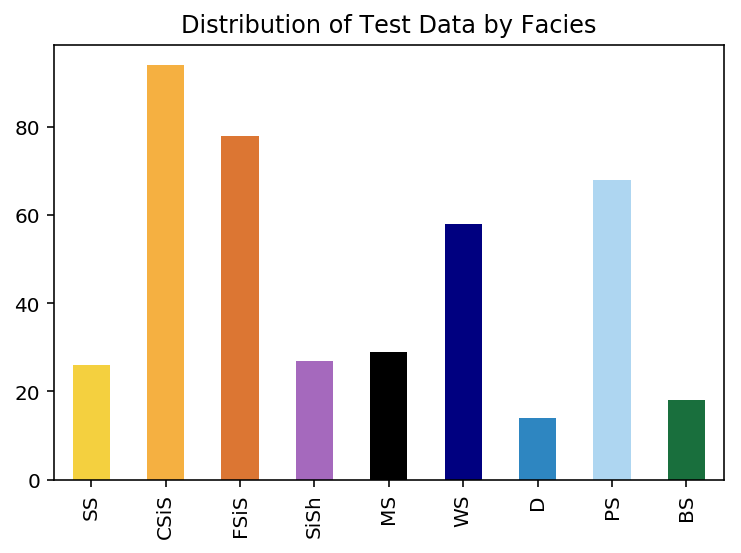

In [31]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
import matplotlib.pyplot as plt
# 1=sandstone  2=c_siltstone   3=f_siltstone # 4=marine_silt_shale 
#5=mudstone 6=wackestone 7=dolomite 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041', '#DC7633','#A569BD',
       '#000000', '#000080', '#2E86C1', '#AED6F1', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

facies_counts = test_set_df['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

#light_rgb = colors.ListedColormap(facies_colors)
facies_counts.plot(kind='bar',color=facies_colors, 
                   
                   title='Distribution of Test Data by Facies')
plt.show()

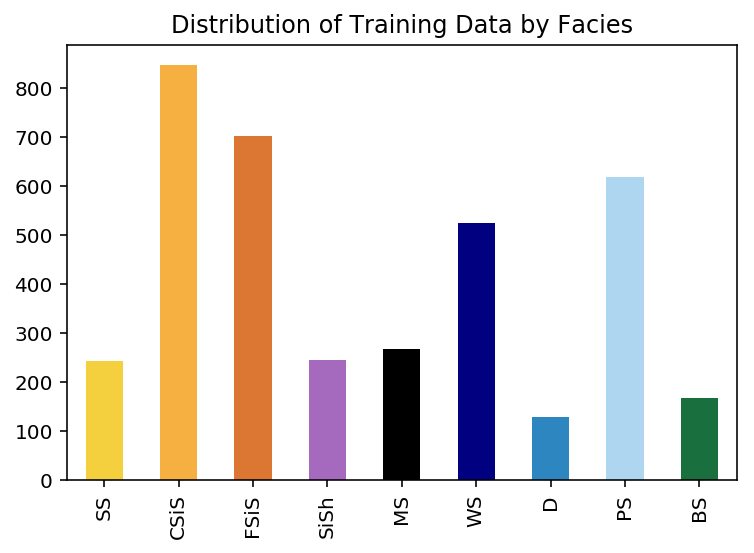

In [32]:
facies_counts = train_set_df['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

#light_rgb = colors.ListedColormap(facies_colors)
facies_counts.plot(kind='bar',color=facies_colors, title='Distribution of Training Data by Facies')
plt.show()

In [ ]:
# df2=pd.read_csv('training_data.csv')

In [33]:
import pickle
pickle.dump(train_set_df,open('train_set_df.pickled','wb'))
pickle.dump(test_set_df,open('test_set_df.pickled','wb'))
